In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("covid_19_india.csv")

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [6]:
df.describe()

,Sno,Cured,Deaths,Confirmed
count,9291.000000,9.291000e+03,9291.000000,9.291000e+03
mean,4646.000000,7.863266e+04,1487.620385,9.183978e+04
std,2682.225009,1.931102e+05,4713.813690,2.166014e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2323.500000,1.520000e+02,2.000000,5.385000e+02
50%,4646.000000,4.308000e+03,66.000000,6.832000e+03
75%,6968.500000,5.772650e+04,926.500000,7.885600e+04
max,9291.000000,1.737080e+06,47827.000000,1.859367e+06


In [9]:
df.corr()

,Sno,Cured,Deaths,Confirmed
Sno,1.000000,0.432994,0.290920,0.425833
Cured,0.432994,1.000000,0.893227,0.995012
Deaths,0.290920,0.893227,1.000000,0.913777
Confirmed,0.425833,0.995012,0.913777,1.000000


In [11]:
df["State/UnionTerritory"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [43]:
df2=df.copy()

In [46]:
a=[]
for d in df["State/UnionTerritory"] :
    if "***" in d :
        a.append(d.replace("***",""))
    else:
        a.append(d)
df["State/UnionTerritory"]=a

In [49]:
len(df["State/UnionTerritory"].unique())

40

In [50]:
import matplotlib.pyplot as plt

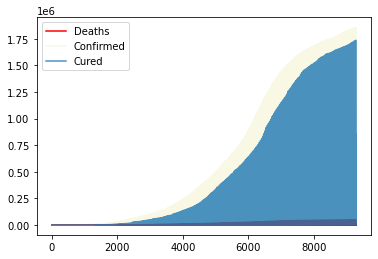

In [73]:

plt.plot(df["Deaths"],label="Deaths",color='r',alpha=1.0)
plt.plot(df["Confirmed"],label="Confirmed",color='y',alpha=0.1)
plt.plot(df["Cured"],label="Cured",alpha=0.8)
plt.legend()
plt.show()

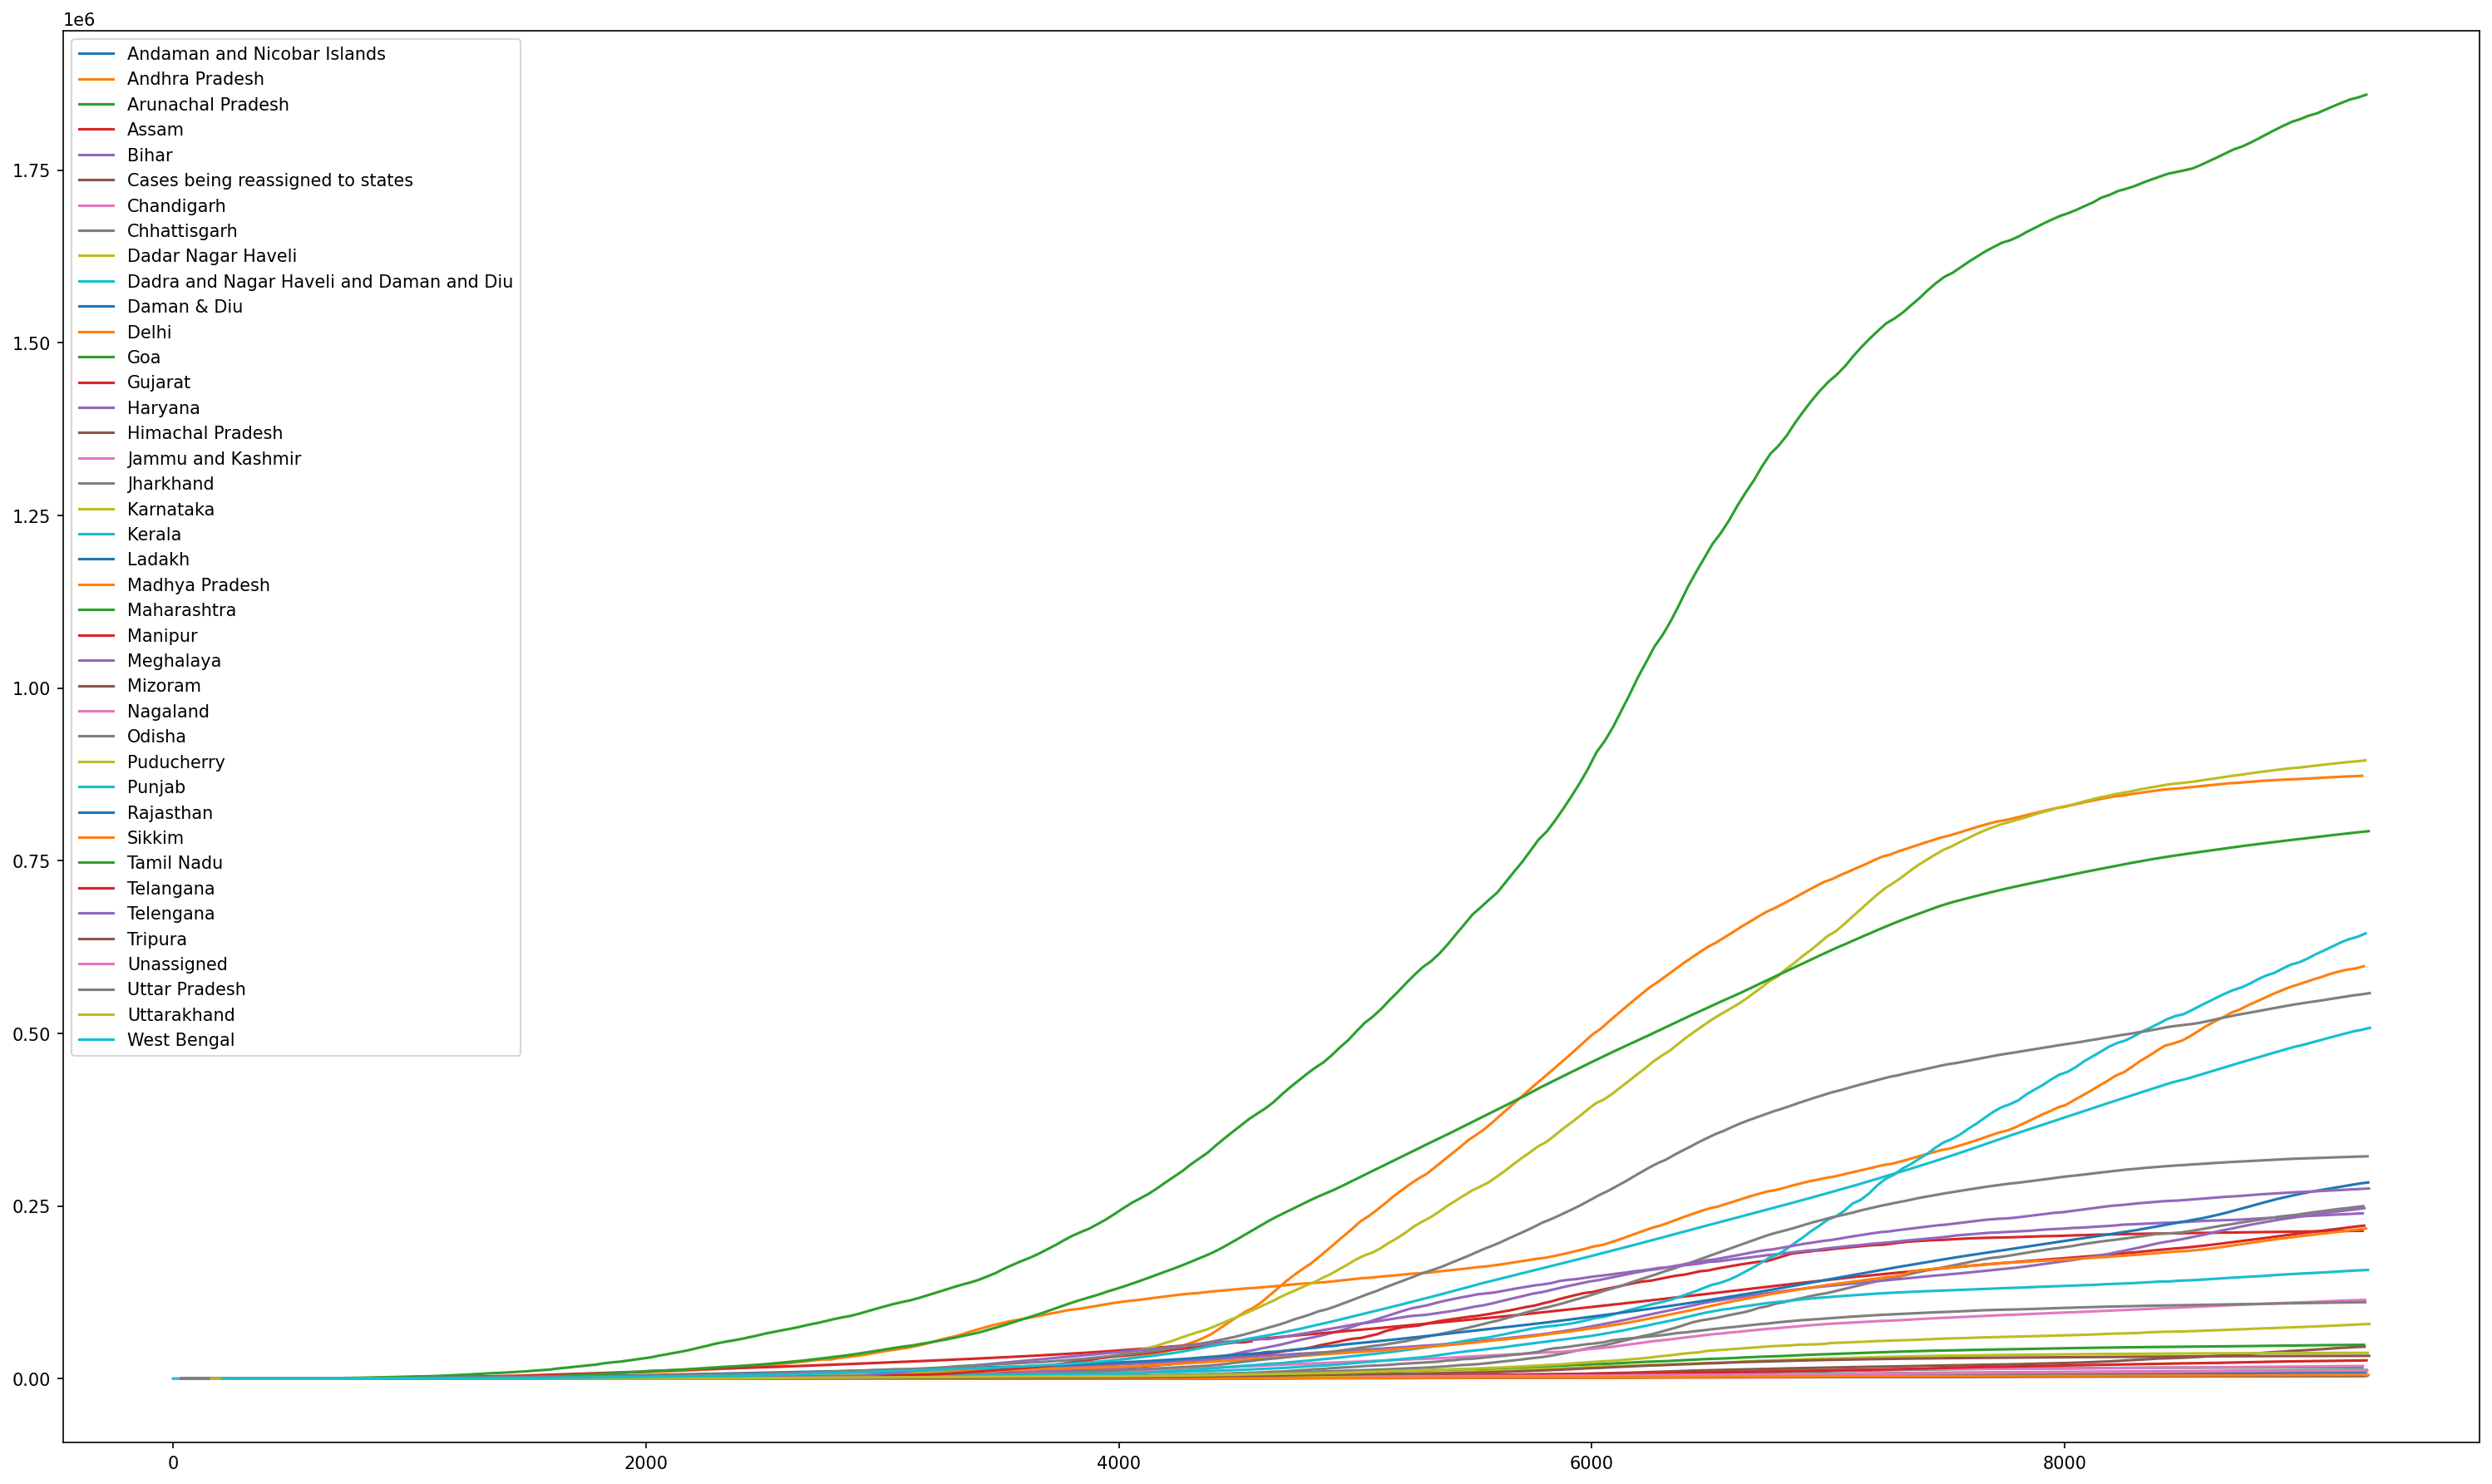

In [103]:
plt.figure(figsize=(25,15),dpi=150)
df.groupby("State/UnionTerritory")["Confirmed"].plot(legend=True)
plt.show()

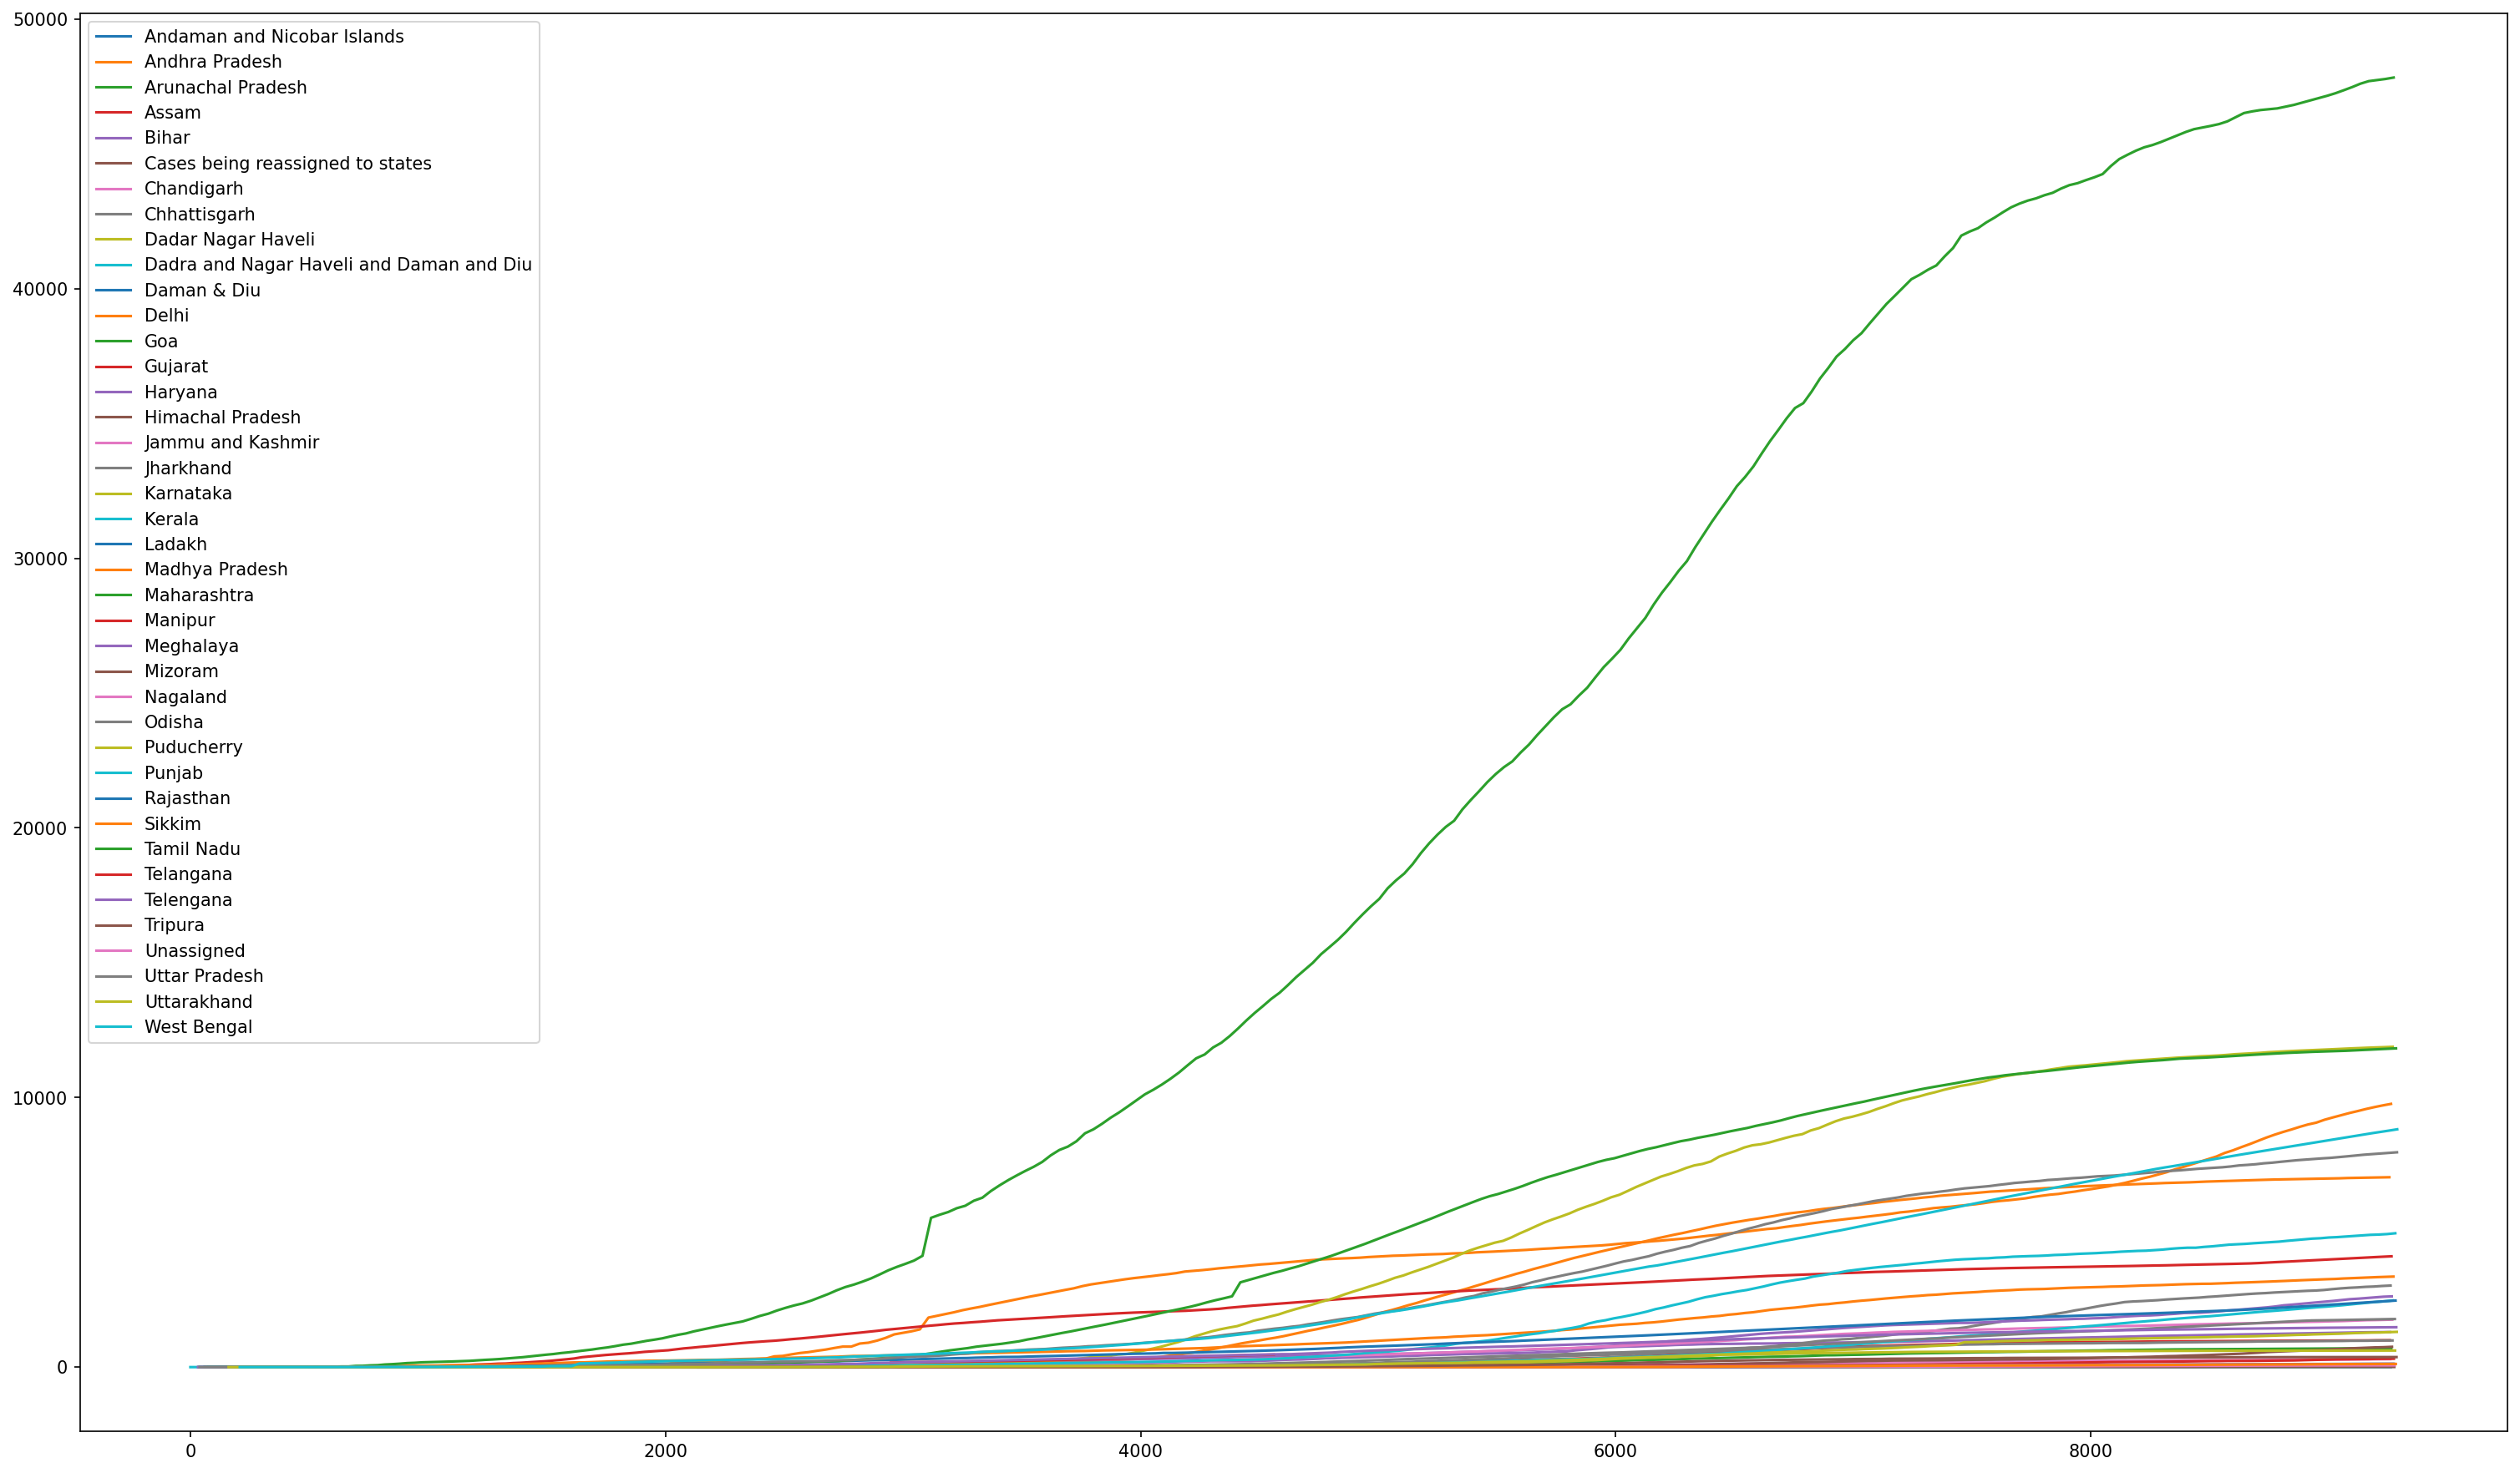

In [104]:
plt.figure(figsize=(25,15),dpi=150)
df.groupby("State/UnionTerritory")["Deaths"].plot(legend=True)
plt.show()

In [144]:
# get top n deaths confirmed cured count wrt state
def get_top(df,col,n,dict):
    states=df["State/UnionTerritory"].unique()
    for state in states:
        count=df[df["State/UnionTerritory"]==state][col].sum()
        if len(dict) < n:
            dict[state]=count
        elif any([value<count for s,value in dict.items()]):
            dict[state]=count

    
    
    

In [160]:
top_deaths={}
get_top(df,"Deaths",5,top_deaths)
top_deaths

{'Kerala': 132008,
 'Telengana': 149804,
 'Delhi': 931396,
 'Rajasthan': 230703,
 'Uttar Pradesh': 756398,
 'Haryana': 194907,
 'Tamil Nadu': 1291048,
 'Karnataka': 1144931,
 'Maharashtra': 5113730,
 'Punjab': 407940,
 'Jammu and Kashmir': 158081,
 'Andhra Pradesh': 715536,
 'West Bengal': 736550,
 'Chhattisgarh': 170085,
 'Gujarat': 574906,
 'Madhya Pradesh': 338597}

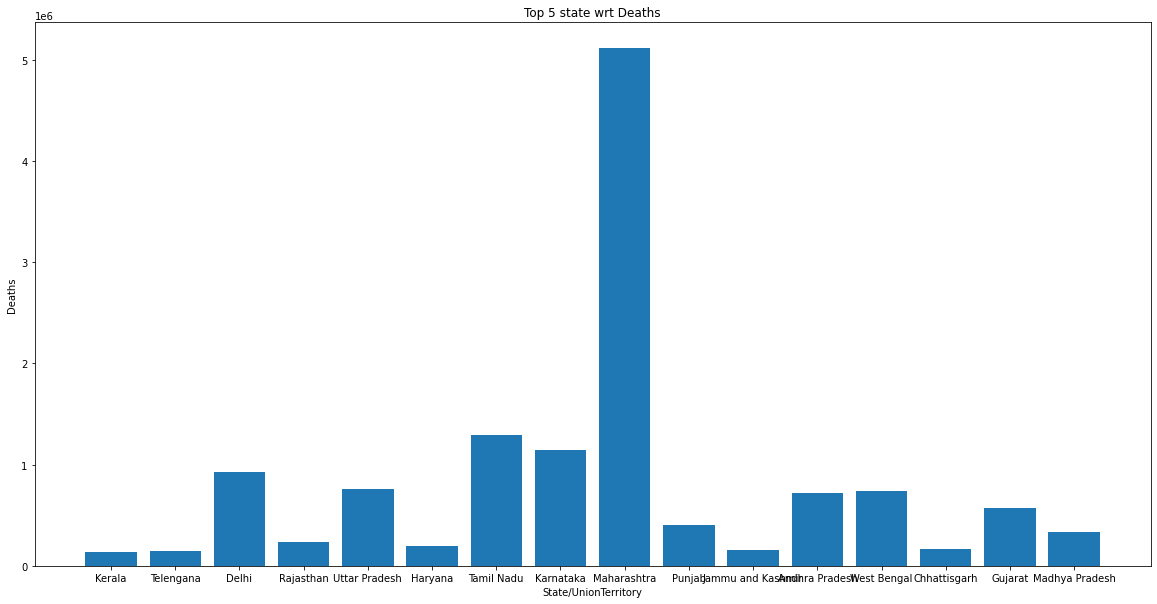

In [168]:
plt.figure(figsize=(20,10))
plt.bar(top_deaths.keys(),top_deaths.values())
plt.title("Top 5 state wrt Deaths")
plt.xlabel("State/UnionTerritory")
plt.ylabel("Deaths")

plt.show()

In [171]:
maha=df[df["State/UnionTerritory"]=="Maharashtra"]

In [172]:
maha

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,77,09/03/20,6:00 PM,Maharashtra,2,0,0,0,2
91,92,10/03/20,6:00 PM,Maharashtra,5,0,0,0,5
97,98,11/03/20,6:00 PM,Maharashtra,2,0,0,0,2
120,121,12/03/20,6:00 PM,Maharashtra,11,0,0,0,11
133,134,13/03/20,6:00 PM,Maharashtra,14,0,0,0,14
...,...,...,...,...,...,...,...,...,...
9135,9136,05/12/20,8:00 AM,Maharashtra,-,-,1710050,47599,1842587
9170,9171,06/12/20,8:00 AM,Maharashtra,-,-,1715884,47694,1847509
9205,9206,07/12/20,8:00 AM,Maharashtra,-,-,1723370,47734,1852266
9240,9241,08/12/20,8:00 AM,Maharashtra,-,-,1730715,47774,1855341


In [175]:
maha["Date"].min(),maha["Date"].max()

('01/04/20', '31/10/20')

In [176]:
maha["Date"]=pd.to_datetime(maha["Date"])

<ipython-input-176-cabff1bdc258>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha["Date"]=pd.to_datetime(maha["Date"])


In [177]:
maha.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [178]:
maha.columns


Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [179]:
maha.drop(['Sno','Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths'],axis=1,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [195]:
maha.reindex(maha["Date"])

,index,Date,Confirmed
Date,,,
2020-09-03,76,2020-09-03,2
2020-10-03,91,2020-10-03,5
2020-11-03,97,2020-11-03,2
2020-12-03,120,2020-12-03,11
2020-03-13,133,2020-03-13,14
...,...,...,...
2020-05-12,9135,2020-05-12,1842587
2020-06-12,9170,2020-06-12,1847509
2020-07-12,9205,2020-07-12,1852266


In [200]:
maha.drop('Date',axis=1,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [202]:
maha.head()

,Confirmed
Date,
2020-09-03,2
2020-10-03,5
2020-11-03,2
2020-12-03,11
2020-03-13,14


In [204]:
maharashtra=maha.resample('W').sum()

In [206]:
maharashtra.head()

,Confirmed
Date,
2020-01-05,10800
2020-01-12,6343823
2020-01-19,0
2020-01-26,0
2020-02-02,0


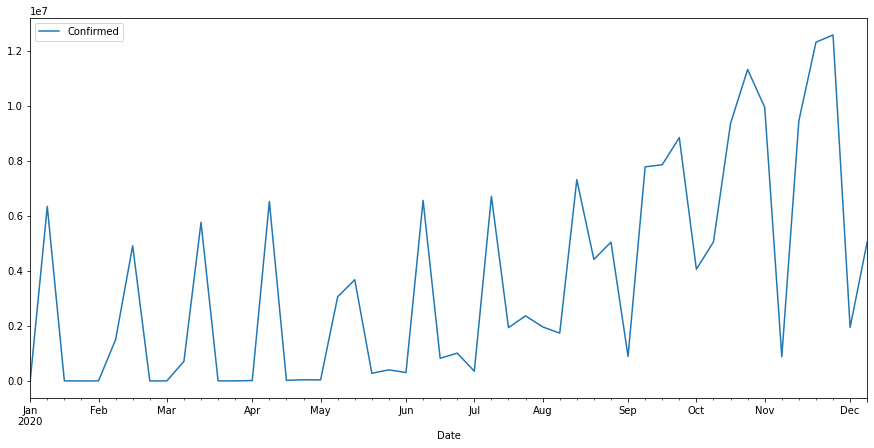

In [207]:
maharashtra.plot(figsize=(15,7))
plt.show()

<ipython-input-211-7495d75a50f0>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(maharashtra, freq = 20, model='additive')


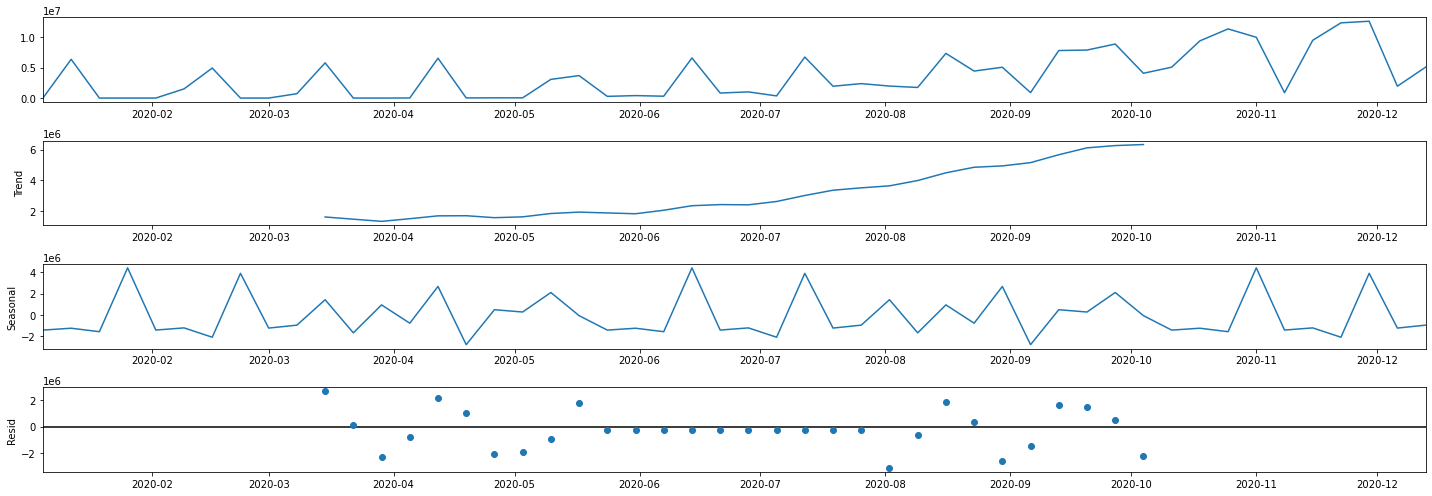

In [211]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7
decomposition = sm.tsa.seasonal_decompose(maharashtra, freq = 20, model='additive')
fig = decomposition.plot()
plt.show()

In [212]:
model=sm.tsa.statespace.SARIMAX(maharashtra,order=(1,1,1),seasonal_order=(1,1,1,12))
result=model.fit()

D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:901: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [214]:
maha.tail()

,Confirmed
Date,
2020-05-12,1842587
2020-06-12,1847509
2020-07-12,1852266
2020-08-12,1855341
2020-09-12,1859367


In [227]:
maharashtra["predicted"]=result.predict(start=pd.to_datetime('2020/07/12'),dynamic=False)

<Figure size 1080x504 with 0 Axes>

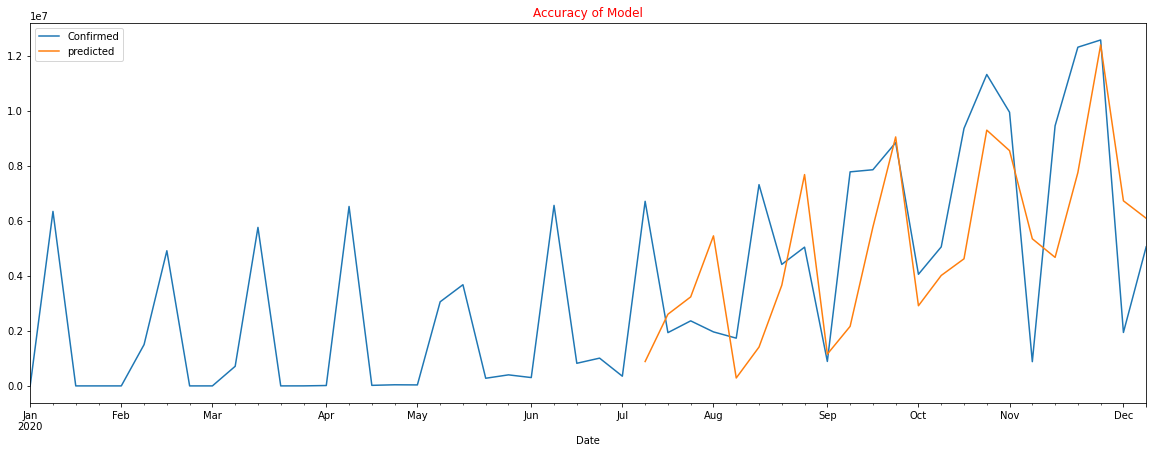

In [251]:
plt.figure(figsize=(15,7))
maharashtra[["Confirmed","predicted"]].plot()
plt.title("Accuracy of Model",color="r")
plt.show()

In [254]:
Future_count=result.get_forecast(steps=20)

<Figure size 1440x360 with 0 Axes>

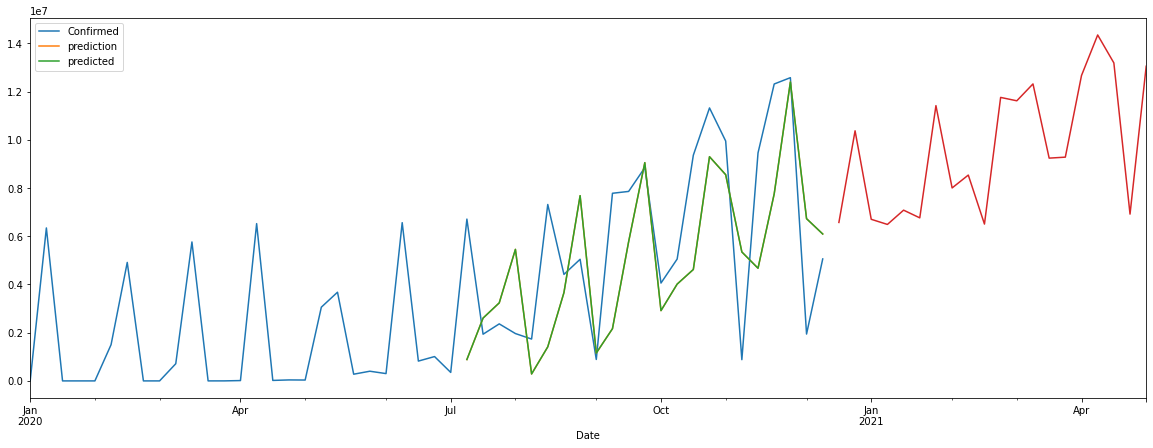

In [256]:
plt.figure(figsize=(20,5))
maharashtra.plot()
Future_count.predicted_mean.plot()
plt.show()